In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

df = pd.read_csv('/content/FINAL (1).csv')

In [31]:
df.describe()

,Unnamed: 0,price,payment_value,review_score
count,119143.000000,118310.000000,119140.000000,118146.000000
mean,59571.000000,120.646603,172.735135,4.015582
std,34393.765898,184.109691,267.776077,1.400436
min,0.000000,0.850000,0.000000,1.000000
25%,29785.500000,39.900000,60.850000,4.000000
50%,59571.000000,74.900000,108.160000,5.000000
75%,89356.500000,134.900000,189.240000,5.000000
max,119142.000000,6735.000000,13664.080000,5.000000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0                     119143 non-null  int64  
 1   customer_city                  119143 non-null  object 
 2   seller_city                    118310 non-null  object 
 3   seller_state                   118310 non-null  object 
 4   product_category_name_english  116576 non-null  object 
 5   price                          118310 non-null  float64
 6   payment_value                  119140 non-null  float64
 7   payment_type                   119140 non-null  object 
 8   order_status                   119143 non-null  object 
 9   order_purchase_timestamp       119143 non-null  object 
 10  order_delivered_customer_date  115722 non-null  object 
 11  review_score                   118146 non-null  float64
 12  review_comment_title          

What is the effect of review length on customer sentiment and review scores in Brazilian e-commerce, and how can this relationship inform strategies to encourage more informative customer feedback?

In [33]:
df.describe()

,Unnamed: 0,price,payment_value,review_score
count,119143.000000,118310.000000,119140.000000,118146.000000
mean,59571.000000,120.646603,172.735135,4.015582
std,34393.765898,184.109691,267.776077,1.400436
min,0.000000,0.850000,0.000000,1.000000
25%,29785.500000,39.900000,60.850000,4.000000
50%,59571.000000,74.900000,108.160000,5.000000
75%,89356.500000,134.900000,189.240000,5.000000
max,119142.000000,6735.000000,13664.080000,5.000000


In [34]:
df.head()

,Unnamed: 0,customer_city,seller_city,seller_state,product_category_name_english,price,payment_value,payment_type,order_status,order_purchase_timestamp,order_delivered_customer_date,review_score,review_comment_title,review_comment_message,review_creation_date
0,0,São Paulo,maua,SP,housewares,29.99,18.12,credit_card,delivered,10/2/2017 10:56,10/10/2017 21:25,4.0,NaN,"I haven't tested the product yet, but it came ...",10/11/2017 0:00
1,1,São Paulo,maua,SP,housewares,29.99,2.00,voucher,delivered,10/2/2017 10:56,10/10/2017 21:25,4.0,NaN,"I haven't tested the product yet, but it came ...",10/11/2017 0:00
2,2,São Paulo,maua,SP,housewares,29.99,18.59,voucher,delivered,10/2/2017 10:56,10/10/2017 21:25,4.0,NaN,"I haven't tested the product yet, but it came ...",10/11/2017 0:00
3,3,barriers,belo horizonte,SP,perfumery,118.70,141.46,boleto,delivered,7/24/2018 20:41,8/7/2018 15:27,4.0,Very good store,Very good product.,8/8/2018 0:00
4,4,VIANOPOLIS,guariba,SP,auto,159.90,179.12,credit_card,delivered,8/8/2018 8:38,8/17/2018 18:06,5.0,NaN,NaN,8/18/2018 0:00


In [35]:
df.sample(5)

,Unnamed: 0,customer_city,seller_city,seller_state,product_category_name_english,price,payment_value,payment_type,order_status,order_purchase_timestamp,order_delivered_customer_date,review_score,review_comment_title,review_comment_message,review_creation_date
74582,74582,sao paulo,sao paulo,SP,furniture_decor,159.00,175.82,credit_card,delivered,1/18/2018 19:47,1/28/2018 16:35,5.0,NaN,As always ... received on time. Beautiful prod...,1/29/2018 0:00
31316,31316,santa luzia,ibitinga,SP,bed_bath_table,39.00,57.23,credit_card,delivered,5/15/2018 12:23,6/1/2018 20:08,3.0,NaN,NaN,6/2/2018 0:00
80778,80778,aracaju,barra mansa,RJ,auto,21.99,47.62,boleto,delivered,8/27/2017 23:02,9/18/2017 19:08,4.0,NaN,NaN,9/19/2017 0:00
28720,28720,sao paulo,sao paulo,SP,sports_leisure,33.99,22.43,voucher,delivered,1/24/2018 12:33,2/7/2018 15:22,5.0,NaN,But it arrived without the batteries.,2/8/2018 0:00
106863,106863,salvador,sao paulo,SP,sports_leisure,59.99,76.98,credit_card,delivered,7/12/2017 13:27,7/24/2017 20:43,5.0,NaN,NaN,7/25/2017 0:00


In [36]:
df.tail()

,Unnamed: 0,customer_city,seller_city,seller_state,product_category_name_english,price,payment_value,payment_type,order_status,order_purchase_timestamp,order_delivered_customer_date,review_score,review_comment_title,review_comment_message,review_creation_date
119138,119138,praia grande,tupa,SP,baby,174.90,195.00,credit_card,delivered,2/6/2018 12:58,2/28/2018 17:37,4.0,NaN,Just a piece that came cracked but okay lol,3/1/2018 0:00
119139,119139,nova vicosa,sao paulo,SP,home_appliances_2,205.99,271.01,credit_card,delivered,8/27/2017 14:46,9/21/2017 11:24,5.0,NaN,It was delivered before the deadline.,9/22/2017 0:00
119140,119140,japuiba,ilicinea,MG,computers_accessories,179.99,441.16,credit_card,delivered,1/8/2018 21:28,1/25/2018 23:32,2.0,NaN,It was delivered only 1. I want to know about ...,1/26/2018 0:00
119141,119141,japuiba,ilicinea,MG,computers_accessories,179.99,441.16,credit_card,delivered,1/8/2018 21:28,1/25/2018 23:32,2.0,NaN,It was delivered only 1. I want to know about ...,1/26/2018 0:00
119142,119142,lapa,franca,SP,health_beauty,68.50,86.86,debit_card,delivered,3/8/2018 20:57,3/16/2018 13:08,5.0,NaN,NaN,3/17/2018 0:00


In [38]:
import pandas as pd
import plotly.express as px

review_col = 'review_comment_message'
rating_col = 'review_score'

df = df.dropna(subset=[review_col, rating_col])
df['review_length'] = df[review_col].apply(lambda x: len(str(x).split()))
df[rating_col] = df[rating_col].astype(str)

fig = px.box(
    df,
    x=rating_col,
    y='review_length',
    color=rating_col,
    color_discrete_sequence=px.colors.qualitative.Set2,
    title='Effect of Review Length on Customer Sentiment (Rating)',
    labels={
        rating_col: 'Rating Score',
        'review_length': 'Review Length (Number of Words)'
    },
    points="outliers"
)

fig.update_layout(
    xaxis_title='Rating Score',
    yaxis_title='Review Length (Number of Words)',
    showlegend=False,
    template='plotly_white'
)

fig.show()


How does the timing of review creation (e.g., delay between purchase and review) influence review scores and customer satisfaction in e-commerce, and what operational changes can mitigate negative impacts of delayed reviews?

In [39]:
import pandas as pd
import plotly.express as px

df = df.dropna(subset=['order_purchase_timestamp', 'review_creation_date', 'review_score'])
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['review_creation_date'] = pd.to_datetime(df['review_creation_date'])
df['review_delay_days'] = (df['review_creation_date'] - df['order_purchase_timestamp']).dt.days
df = df[df['review_delay_days'] >= 0]

bins = [-1, 0, 3, 7, 14]
labels = ['Same Day', '1–3 Days', '4–7 Days', '8–14 Days']
df['delay_category'] = pd.cut(df['review_delay_days'], bins=bins, labels=labels)
df['review_score'] = pd.to_numeric(df['review_score'], errors='coerce')


grouped = df.groupby('delay_category', observed=True)['review_score'].mean().reset_index()

fig = px.bar(
    grouped,
    x='delay_category',
    y='review_score',
    text='review_score',
    color='delay_category',
    color_discrete_sequence=px.colors.qualitative.Set2,
    title='Average Review Score by Review Delay',
    labels={
        'delay_category': 'Delay Between Purchase and Review',
        'review_score': 'Average Review Score'
    }
)

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    xaxis_title='Delay Between Purchase and Review',
    yaxis_title='Average Review Score',
    showlegend=False,
    template='plotly_white'
)

fig.show()


<ipython-input-39-e505b97bcd1d>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [40]:
import pandas as pd
import plotly.express as px

df = df.dropna(subset=['seller_state', 'review_score', 'price'])
df['review_score'] = pd.to_numeric(df['review_score'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

state_grouped = df.groupby('seller_state').agg({
    'review_score': 'mean',
    'price': 'sum',
    'Unnamed: 0': 'count'
}).reset_index().rename(columns={'Unnamed: 0': 'order_count'})

state_grouped = state_grouped.sort_values(by='review_score', ascending=False)

fig = px.bar(
    state_grouped,
    x='seller_state',
    y='price',
    color='price',
    text='price',
    title='Total Sales by State',
    labels={
        'seller_state': 'State',
        'price': 'Total Sales (R$)'
    },
    color_continuous_scale='viridis'
)

fig.update_traces(texttemplate='R$%{text:.2f}', textposition='outside')
fig.update_layout(
    xaxis_title='State',
    yaxis_title='Total Sales (R$)',
    template='plotly_white'
)

fig.show()


<ipython-input-40-c853d9904234>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-40-c853d9904234>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [41]:
import pandas as pd
import plotly.express as px

df = df.dropna(subset=['payment_type'])
payment_counts = df['payment_type'].value_counts().reset_index()
payment_counts.columns = ['payment_type', 'count']

fig = px.pie(
    payment_counts,
    names='payment_type',
    values='count',
    title='Payment Type Distribution',
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.update_traces(
    textposition='inside',
    textinfo='percent+label',
    pull=[0.05] * len(payment_counts)
)

fig.update_layout(
    showlegend=True,
    legend_title='Payment Types',
    template='plotly_white'
)

fig.show()


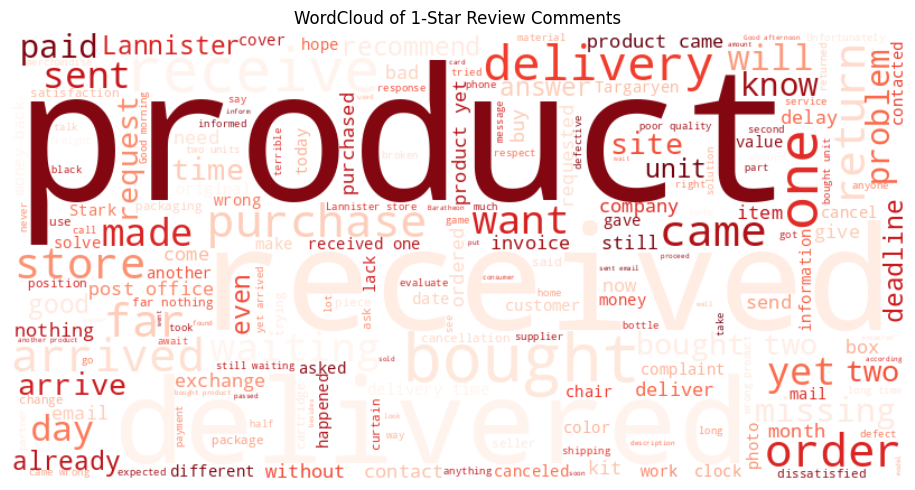

In [44]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

df = df.dropna(subset=['review_score', 'review_comment_message'])
df_1star = df[df['review_score'] == 1]

text = " ".join(review for review in df_1star['review_comment_message'])
stopwords = set(STOPWORDS)

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stopwords,
    colormap='Reds',
    max_words=200
).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of 1-Star Review Comments")
plt.tight_layout()
plt.show()


**World Cloud does not support plotly library**

In [45]:
import pandas as pd
import plotly.express as px

top_categories = df["product_category_name_english"].value_counts().nlargest(10)
top_df = top_categories.reset_index()
top_df.columns = ['product_category', 'order_count']

fig = px.bar(
    top_df,
    x='order_count',
    y='product_category',
    orientation='h',
    text='order_count',
    title='Top 10 Most Sold Product Categories',
    labels={
        'order_count': 'Number of Orders',
        'product_category': 'Product Category'
    },
    color='order_count',
    color_continuous_scale='viridis'
)

fig.update_traces(textposition='outside')
fig.update_layout(
    yaxis=dict(autorange='reversed'),  # To match Seaborn's descending order
    template='plotly_white'
)

fig.show()


In [46]:
import plotly.express as px

review_counts = df["review_score"].dropna().value_counts().sort_index()

fig = px.bar(
    x=review_counts.index,
    y=review_counts.values,
    labels={'x': 'Review Score', 'y': 'Count'},
    title='Review Score Distribution',
    color=review_counts.values,
    color_continuous_scale='magma'
)

fig.show()


In [47]:

df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'], errors='coerce')
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'], errors='coerce')
df['review_creation_date'] = pd.to_datetime(df['review_creation_date'], errors='coerce')


In [48]:
fig = px.pie(df, names='order_status', title='Order Status Distribution',
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()


In [20]:
avg_price = df.groupby('product_category_name_english')['price'].mean().dropna()
top_categories = df['product_category_name_english'].value_counts().nlargest(10).index
avg_price_top = avg_price[top_categories].sort_values(ascending=False)
fig = px.bar(avg_price_top, x=avg_price_top.index, y=avg_price_top.values,
             labels={'x': 'Product Category', 'y': 'Average Price'},
             title='Average Price for Top 10 Product Categories',
             color=avg_price_top.values, color_continuous_scale='Plasma')
fig.show()


In [49]:
top_customer_cities = df['customer_city'].value_counts().nlargest(10).reset_index()
top_customer_cities.columns = ['customer_city', 'orders']
fig = px.bar(top_customer_cities, x='customer_city', y='orders',
             title='Top 10 Customer Cities by Order Volume',
             color='orders', color_continuous_scale='Blues')
fig.show()


In [50]:
monthly_reviews = df.set_index('review_creation_date').resample('M')['review_score'].mean().dropna()
fig = px.line(monthly_reviews, x=monthly_reviews.index, y=monthly_reviews.values,
              title='Monthly Average Review Score Over Time',
              labels={'x': 'Month', 'y': 'Average Review Score'})
fig.show()


<ipython-input-50-8423c6db045a>:1: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [51]:
fig = px.box(df[df['price'] < 500], x='review_score', y='price',
             title='Price vs. Review Score (Under $500)',
             labels={'price': 'Product Price', 'review_score': 'Review Score'},
             color='review_score')
fig.show()


In [52]:
df['delivery_delay'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days
filtered_df = df[(df['delivery_delay'] >= 0) & (df['delivery_delay'] < 30)]
fig = px.box(filtered_df, x='review_score', y='delivery_delay',
             title='Delivery Delay vs. Review Score (Under 30 Days)',
             labels={'delivery_delay': 'Delivery Time (Days)', 'review_score': 'Review Score'},
             color='review_score')
fig.show()


In [53]:
sales_value = df.groupby('product_category_name_english')['price'].sum().dropna().nlargest(10)
fig = px.bar(sales_value, x=sales_value.index, y=sales_value.values,
             title='Total Sales Value by Product Category',
             labels={'x': 'Product Category', 'y': 'Total Sales'},
             color=sales_value.values, color_continuous_scale='Turbo')
fig.show()
